In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np
from torch.utils.data import DataLoader

# Helper Functions

In [2]:
def show_image(img):
    plt.figure(figsize=(4,4));
    plt.imshow(img, cmap = "gray");
    plt.axis("off");

In [3]:
def map_to_lbl(idx):
    a = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']
    return a[idx]

In [4]:
map_to_lbl(1)

'automobile'

# Dataset

In [ ]:
convert_to_3_channels = transforms.Lambda(
        lambda x: torch.cat([x, x, x], 0))

In [92]:
train_tfms = T.Compose([
    T.RandomCrop((28,28)),
    T.Grayscale(),
    T.ToTensor(),
    T.Lambda(lambda x: x.view(x.shape[1]**2)) # reshaping for our input shape
])

In [93]:
ds = torchvision.datasets.CIFAR10(root = "data/", 
                                  train = True, 
                                  transform  = train_tfms, 
                                  target_transform = None, 
                                  download = False)

In [94]:
idx = 131

In [95]:
sample = ds[idx]

In [96]:
img, lbl = sample

In [97]:
img.shape

torch.Size([784])

'horse'

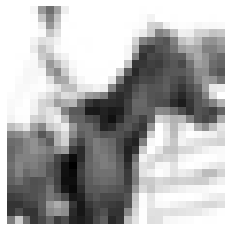

In [99]:
show_image(np.array(img).reshape(28,28))
map_to_lbl(lbl)

# Dataloader

In [100]:
train_loader = DataLoader(ds,
                          batch_size=50000,
                          num_workers=4,
                          shuffle=True,
                          pin_memory=True)

# Get statistics

In [101]:
for idx, batch in enumerate(train_loader):
    break

In [102]:
batch[0].shape

torch.Size([50000, 784])

In [103]:
torch.var(batch[0])

tensor(0.0553)

In [104]:
torch.mean(batch[0])

tensor(0.4759)

In [108]:
a = np.array(batch[0], dtype= np.float64)

In [109]:
a.shape

(50000, 784)

In [113]:
np.diag(1 / (a.var(axis=0) * 2)).dtype

dtype('float64')

In [116]:
np.mean(a)

0.47594396991586485